# CME 241 Final

## Shaan Patel

### Question 1

In [1]:
from rl.distribution import Categorical
from rl.markov_process import NonTerminal
from rl.approximate_dynamic_programming import NTStateDistribution

import itertools

from rl.final.f_22_p1_skeleton import double_q_learning, q_learning, P1State, P1MDP

import matplotlib.pyplot as plt

In [29]:
startstate: NTStateDistribution = Categorical({NonTerminal(P1State("A")): 1})

mdp= P1MDP(10)

dqiter = double_q_learning(
    mdp=mdp,
    states=startstate,
    gamma=1
)

dbql = itertools.islice(dqiter, 400)

sqiter = q_learning(
    mdp=mdp,
    states=startstate,
    gamma=1
)

sql = itertools.islice(sqiter, 400)

avgdbq = []
avgsq = []

for entry in dbql:
    avgdbq.append(entry((NonTerminal(P1State("A")),"a1")))

for entry in sql:
    avgsq.append(entry((NonTerminal(P1State("A")),"a1")))


for i in range(1,100):
    iter_dbq = itertools.islice(
        double_q_learning(
            mdp=mdp,
            states=startstate,
            gamma=1
        ), 400
    )

    iter_sq = itertools.islice(
        q_learning(
            mdp=mdp,
            states=startstate,
            gamma=1
        ), 400
    )

    i = 0
    for entry in iter_dbq:
        avgdbq[i] += (1/(i+1))*(entry((NonTerminal(P1State("A")), "a1")) - avgdbq[i])

    j = 0
    for entry in iter_sq:
        avgsq[j] += (1/(j+1))*(entry((NonTerminal(P1State("A")), "a1")) - avgsq[j])

        

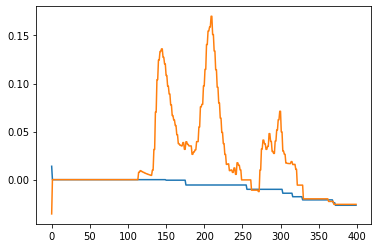

In [30]:
plt.plot(avgdbq)
plt.plot(avgsq)